In [91]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer

In [2]:
df=pd.read_csv("drugs_side_effects_drugs_com.csv")

In [3]:
df

,drug_name,medical_condition,side_effects,generic_name,drug_classes,brand_names,activity,rx_otc,pregnancy_category,csa,alcohol,related_drugs,medical_condition_description,rating,no_of_reviews,drug_link,medical_condition_url
0,doxycycline,Acne,"(hives, difficult breathing, swelling in your ...",doxycycline,"Miscellaneous antimalarials, Tetracyclines","Acticlate, Adoxa CK, Adoxa Pak, Adoxa TT, Alod...",87%,Rx,D,N,X,amoxicillin: https://www.drugs.com/amoxicillin...,Acne Other names: Acne Vulgaris; Blackheads; B...,6.8,760.0,https://www.drugs.com/doxycycline.html,https://www.drugs.com/condition/acne.html
1,spironolactone,Acne,hives ; difficulty breathing; swelling of your...,spironolactone,"Aldosterone receptor antagonists, Potassium-sp...","Aldactone, CaroSpir",82%,Rx,C,N,X,amlodipine: https://www.drugs.com/amlodipine.h...,Acne Other names: Acne Vulgaris; Blackheads; B...,7.2,449.0,https://www.drugs.com/spironolactone.html,https://www.drugs.com/condition/acne.html
2,minocycline,Acne,"skin rash, fever, swollen glands, flu-like sym...",minocycline,Tetracyclines,"Dynacin, Minocin, Minolira, Solodyn, Ximino, V...",48%,Rx,D,N,NaN,amoxicillin: https://www.drugs.com/amoxicillin...,Acne Other names: Acne Vulgaris; Blackheads; B...,5.7,482.0,https://www.drugs.com/minocycline.html,https://www.drugs.com/condition/acne.html
3,Accutane,Acne,problems with your vision or hearing; muscle o...,isotretinoin (oral),"Miscellaneous antineoplastics, Miscellaneous u...",NaN,41%,Rx,X,N,X,doxycycline: https://www.drugs.com/doxycycline...,Acne Other names: Acne Vulgaris; Blackheads; B...,7.9,623.0,https://www.drugs.com/accutane.html,https://www.drugs.com/condition/acne.html
4,clindamycin,Acne,hives ; difficult breathing; swelling of your ...,clindamycin topical,"Topical acne agents, Vaginal anti-infectives","Cleocin T, Clindacin ETZ, Clindacin P, Clindag...",39%,Rx,B,N,NaN,doxycycline: https://www.drugs.com/doxycycline...,Acne Other names: Acne Vulgaris; Blackheads; B...,7.4,146.0,https://www.drugs.com/mtm/clindamycin-topical....,https://www.drugs.com/condition/acne.html
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2926,benzphetamine,Weight Loss,hives ; difficulty breathing; swelling of your...,benzphetamine,"Anorexiants, CNS stimulants","Didrex, Regimex",2%,Rx,X,3,X,phentermine: https://www.drugs.com/phentermine...,Weight Loss (Obesity/Overweight) More than hal...,7.5,17.0,https://www.drugs.com/mtm/benzphetamine.html,https://www.drugs.com/condition/obesity.html
2927,fenfluramine,Weight Loss,hives ; difficult breathing; swelling of your ...,fenfluramine,"Anorexiants, CNS stimulants, Miscellaneous ant...",Fintepla,1%,Rx,C,4,X,NaN,Weight Loss (Obesity/Overweight) More than hal...,NaN,NaN,https://www.drugs.com/mtm/fenfluramine.html,https://www.drugs.com/condition/obesity.html
2928,Fendique ER,Weight Loss,NaN,phendimetrazine tartrate,"Anorexiants, CNS stimulants",NaN,0%,Rx,C,3,X,phentermine: https://www.drugs.com/phentermine...,Weight Loss (Obesity/Overweight) More than hal...,NaN,NaN,https://www.drugs.com/pro/fendique-er.html,https://www.drugs.com/condition/obesity.html
2929,Imcivree,Weight Loss,"Imcivree may cause serious side effects, inclu...",setmelanotide,Melanocortin receptor agonists,NaN,0%,Rx,NaN,N,NaN,phentermine: https://www.drugs.com/phentermine...,Weight Loss (Obesity/Overweight) More than hal...,NaN,NaN,https://www.drugs.com/imcivree.html,https://www.drugs.com/condition/obesity.html


In [4]:
df.describe()

,rating,no_of_reviews
count,1586.000000,1586.000000
mean,6.812926,75.064943
std,2.313044,184.900847
min,0.000000,1.000000
25%,5.600000,2.000000
50%,7.000000,12.000000
75%,8.500000,58.000000
max,10.000000,2934.000000


In [8]:
df.isnull().sum()

drug_name                           0
medical_condition                   0
side_effects                      124
generic_name                       43
drug_classes                       82
brand_names                      1213
activity                            0
rx_otc                              1
pregnancy_category                229
csa                                 0
alcohol                          1554
related_drugs                    1469
medical_condition_description       0
rating                           1345
no_of_reviews                    1345
drug_link                           0
medical_condition_url               0
dtype: int64

C:\Users\salag\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


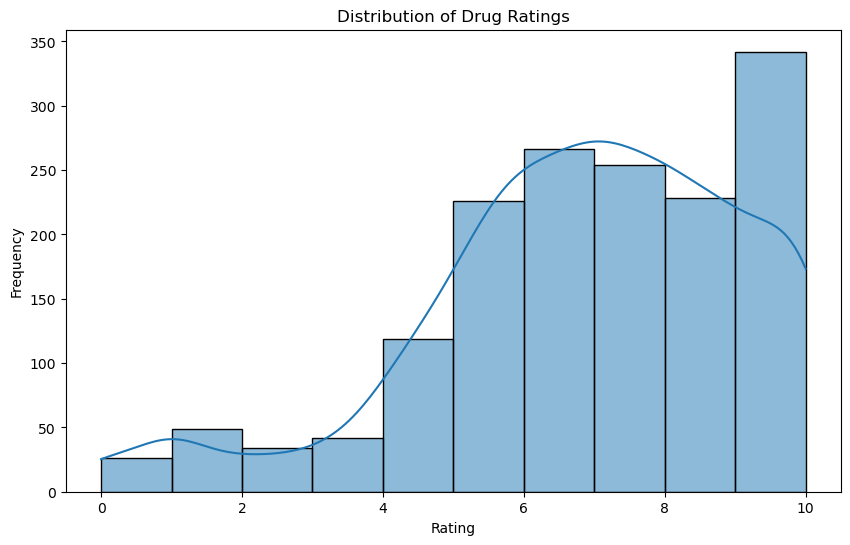

In [12]:
plt.figure(figsize=(10, 6))
sns.histplot(df['rating'], bins=10, kde=True)
plt.title('Distribution of Drug Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


In [13]:
top_drugs =df.groupby('medical_condition')['drug_name'].value_counts().nlargest(10)
print(top_drugs)

medical_condition  drug_name    
Acne               minocycline      2
Eczema             fluocinolone     2
Herpes             acyclovir        2
ADHD               Adderall         1
                   Adderall XR      1
                   Mydayis          1
                   Qelbree          1
                   QuilliChew ER    1
                   Quillivant XR    1
                   Relexxii         1
Name: count, dtype: int64


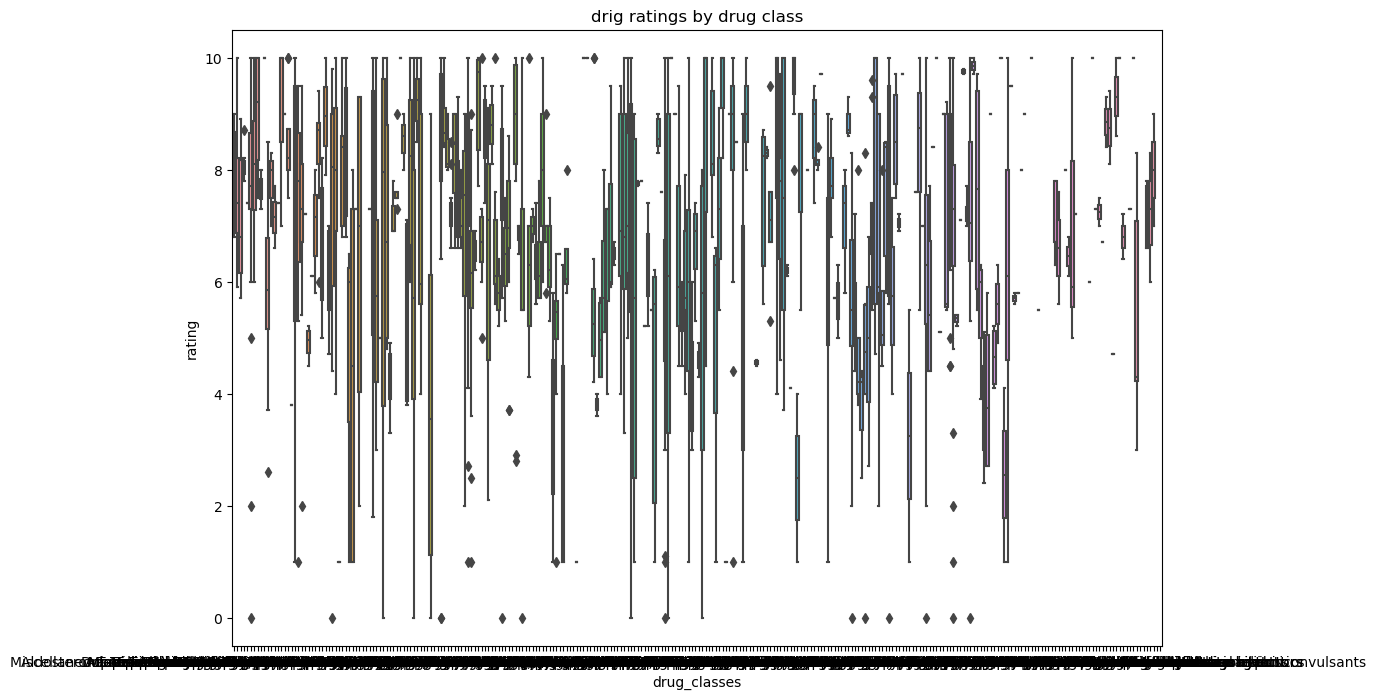

In [20]:
plt.figure(figsize=(12,8))
sns.boxplot(x='drug_classes',y='rating',data=df)
plt.title("drig ratings by drug class")
plt.show()

In [40]:
avg_ratings=df_cleaned.groupby('drug_classes')['rating'].mean().sort_values(ascending=False)

In [41]:
avg_ratings

drug_classes
Dopaminergic antiparkinsonism agents, Monoamine oxidase inhibitors    10.0
Amylin analogs                                                        10.0
Barbiturates                                                          10.0
Gamma-aminobutyric acid reuptake inhibitors                           10.0
Platelet aggregation inhibitors, Salicylates                          10.0
                                                                      ... 
Contraceptives, Sex hormone combinations                               3.8
Thiazide diuretics                                                     3.8
ACE inhibitors with thiazides                                          3.2
Alkylating agents                                                      1.0
Calcium channel blocking agents, Group IV antiarrhythmics              0.0
Name: rating, Length: 87, dtype: float64

In [43]:
avg_ratings1=df_cleaned.groupby('drug_name')['rating'].mean().sort_values(ascending=False)

In [44]:
avg_ratings1

drug_name
clemastine                                 10.0
Drixoral Cold and Allergy                  10.0
insulin aspart/insulin aspart protamine    10.0
insulin isophane                           10.0
aspirin                                    10.0
                                           ... 
captopril / hydrochlorothiazide             0.0
Urelle                                      0.0
chlophedianol / pyrilamine                  0.0
Novolin N                                   0.0
acetaminophen / dexbrompheniramine          0.0
Name: rating, Length: 251, dtype: float64

In [46]:
# Identify the most frequent side effects per drug class
common_side_effects = df_cleaned.groupby('drug_classes')['side_effects'].apply(lambda x: x.mode().iloc[0])

In [51]:
common_side_effects.head(1)

drug_classes
ACE inhibitors with calcium channel blocking agents    hives ; severe stomach pain; difficulty breath...
Name: side_effects, dtype: object

In [52]:
# Identify average ratings per medical condition
condition_ratings = df_cleaned.groupby('medical_condition')['rating'].mean().sort_values(ascending=False)


In [53]:
condition_ratings

medical_condition
Stroke                  10.000000
Schizophrenia            8.480000
Erectile Dysfunction     8.350000
Anxiety                  8.026667
Migraine                 7.920000
Depression               7.870000
Covid 19                 7.800000
Weight Loss              7.800000
ADHD                     7.561538
Diabetes (Type 1)        7.525000
Bronchitis               7.500000
GERD (Heartburn)         7.500000
Hayfever                 7.385714
Bipolar Disorder         7.292857
Pain                     6.954167
Insomnia                 6.868750
Acne                     6.676471
Osteoarthritis           6.644444
Seizures                 6.533333
Angina                   6.333333
Hypertension             6.125000
UTI                      5.980000
Incontinence             5.716667
Psoriasis                5.600000
Diabetes (Type 2)        5.578261
Colds & Flu              5.450000
AIDS/HIV                 5.100000
Allergies                4.700000
Cholesterol              4.500

In [98]:
data_clean = df[['drug_classes', 'medical_condition', 'rating', 'no_of_reviews']].dropna()

In [99]:
data_clean

,drug_classes,medical_condition,rating,no_of_reviews
0,"Miscellaneous antimalarials, Tetracyclines",Acne,6.8,760.0
1,"Aldosterone receptor antagonists, Potassium-sp...",Acne,7.2,449.0
2,Tetracyclines,Acne,5.7,482.0
3,"Miscellaneous antineoplastics, Miscellaneous u...",Acne,7.9,623.0
4,"Topical acne agents, Vaginal anti-infectives",Acne,7.4,146.0
...,...,...,...,...
2921,Anorexiants,Weight Loss,7.8,679.0
2922,"Anorexiants, CNS stimulants",Weight Loss,6.0,5.0
2923,Gonadotropins,Weight Loss,7.0,14.0
2924,Anorexiants,Weight Loss,7.6,40.0


In [100]:
data_encoded=pd.get_dummies(data_clean,columns=['drug_classes', 'medical_condition'], drop_first=True)

In [101]:
data_encoded

,rating,no_of_reviews,drug_classes_ACE inhibitors with calcium channel blocking agents,drug_classes_ACE inhibitors with thiazides,drug_classes_AMPA receptor antagonists,"drug_classes_Adamantane antivirals, Dopaminergic antiparkinsonism agents",drug_classes_Adrenergic bronchodilators,drug_classes_Adrenergic uptake inhibitors for ADHD,"drug_classes_Agents for pulmonary hypertension, Impotence agents","drug_classes_Aldosterone receptor antagonists, Potassium-sparing diuretics",...,medical_condition_Pain,medical_condition_Pneumonia,medical_condition_Psoriasis,medical_condition_Rheumatoid Arthritis,medical_condition_Schizophrenia,medical_condition_Seizures,medical_condition_Stroke,medical_condition_Swine Flu,medical_condition_UTI,medical_condition_Weight Loss
0,6.8,760.0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,7.2,449.0,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
2,5.7,482.0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,7.9,623.0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,7.4,146.0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2921,7.8,679.0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2922,6.0,5.0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2923,7.0,14.0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2924,7.6,40.0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [102]:
X = data_encoded.drop(['rating'], axis=1)
y = data_encoded['rating']

In [106]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [104]:
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [105]:
y_pred = rf_model.predict(X_test)

In [107]:
# Evaluate model performance
mse = mean_squared_error(y_test, y_pred)
print(f"Random Forest Model Mean Squared Error: {mse:.2f}")

Random Forest Model Mean Squared Error: 4.79


In [110]:
# Statistical Tests
# ANOVA: Testing whether ratings differ significantly by drug classes
from scipy.stats import chi2_contingency, f_oneway
anova_result = f_oneway(
    *[data_clean[data_clean['drug_classes'] == cls]['rating'] for cls in data_clean['drug_classes'].unique()]
)
print(f"ANOVA Test Result: F-statistic = {anova_result.statistic:.2f}, p-value = {anova_result.pvalue:.4f}")


ANOVA Test Result: F-statistic = 2.65, p-value = 0.0000


In [113]:
# Check if the 'side_effects' column exists
if 'side_effects' in df.columns:
    # Handle missing values in the 'side_effects' column
    side_effects_cleaned = df['side_effects'].dropna()

    # Count the frequency of each side effect
    side_effect_counts = side_effects_cleaned.value_counts()

    # Get the top 10 most common side effects
    most_common_side_effects = side_effect_counts.head(10)

    # Print the results
    print("Top 10 Most Common Side Effects:")
    print(most_common_side_effects)
else:
    print("The column 'side_effects' is not found in the dataset.")

Top 10 Most Common Side Effects:
side_effects
hives ; difficult breathing; swelling of your face, lips, tongue, or throat. This medicine may cause serious side effects. Stop using this medicine and call your doctor at once if you have: redness or swelling of the treated area; increased pain; or severe burning or skin irritation such as a rash, itching, pain, or blistering. Less serious side effects may be more likely, and you may have none at all.                                                                                                                                                                                           10
hives ; difficult breathing; swelling of your face, lips, tongue, or throat. This medicine may cause serious side effects. Stop using this medicine and call your doctor at once if you have: bone pain, muscle weakness; confusion, changes in your mental state, seizure (convulsions); or pale skin, feeling light-headed or short of breath, rapid heart rate. Less